### Cellular Automata Traffic- MOTORWAY MADNESS II - Ira Shokar  ###

In [2]:
import numpy as np                                  #imports
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
def single_lane_road_open(n, div, vmax, v_initial, prob_car_daw, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        div = rate of new cars joining the road
        vmax = max speed of the cars
        v_initial = speed of the cars when joining the road
        prob_car_daw = probability of the cars dawdeling 
        max_iterations = number of timesteps
    ''' 
    
    #Create empty road and matrix to store iterations
    road = np.zeros(n)                          
    matrix = np.zeros((max_iterations, n))
    data= np.zeros((max_iterations, 3))
    iterations = 1
    
    while iterations in range(max_iterations):
        
        #Avoid situation where last car doesn't move.
        road[np.size(road)-1]=0     
        
        
        ### Rule 1 ###
        
        # If the velocity v of the car is lower than vmax , and the distance to the next car
        # ahead is larger than v + 1, the speed is increased by one.
        for i in range(np.size(road)-2):
            if road[i]>1:                               
                if sum(road[i+1:i+1+int(road[i])])==0:
                    if road[i]<vmax:
                        road[i]+=1
                        
            
               ### Rule 2 ###
                
               # If a driver at site i sees the next vehicle at site i+j, with j < v, 
               # they reduce speed to j −1. 
                else:
                    count = i
                    #If there is a car directly in front slow to stationary.
                    if road[count+1]!=0:            
                        road[i]=1
                    else:
                        while road[count+1]<1:
                            #Count is the distance between two cars plus element index.
                            count+=1     
                            #Add 1 back on to account for the start being count +1.
                            road[i]=count-i+1     
                            
               
                ### Rule 3 ###
                
                # The velocity of each moving vehicle is decreased by one with probability p.
                if np.random.randint(1, 100)<=prob_car_daw*100:       
                    if road[i]>1:                                     
                        road[i]-=1
                        
                        
                        
        ### Rule 4 ###
        
        # Each vehicle is advanced by v sites.
        # As the vechicles move forward we have to iterate in reverse as cars move forward.
            
            #Special case where car is stationary.
            elif road[i]==1:                        
                if i<n-1:
                    #If no cars in front, start moving at v=1.
                    if road[i+1]!=1:                
                           road[i]=2
         
        
        for i in range(np.size(road)-1, -1, -1):    
            #for cars that go beyond the road we treat them as no longer existing- open system.
            if i+int(road[i])>n:            
                road[i]=0
                
            else:
                #cars move forward 
                if road[i]>0:                       
                    road= np.insert(road, i+int(road[i]), road[i])       
                    road = np.delete(road, i)

        
        #car generation
        if iterations%div ==1:
            road[0]= v_initial                                                  
        

        #visualisation
        for i in range(np.size(road)):
            if road[i]==0:
                matrix[iterations, i]= 0
            else:
                matrix[iterations, i]= 10
    
        #data collection
        data[iterations, 0]= iterations
        data[iterations, 1]= np.count_nonzero(road)/n
        data[iterations, 2]= round(sum(road)/np.count_nonzero(road) -1, 2)
        
        ### Alternate visualiation tools ###
        
        #print(iterations, road)
        
        #street = []
        #for i in range(np.size(road)):
            #if road[i]==0:
                #street.append(' ')
            #else:
                #street.append(road[i]-1)
       # print(iterations , street)
    
        iterations +=1
 
    fig5 = plt.figure(figsize=(50,50))
    ax5 = fig5.add_subplot(111)
    ax5.imshow (matrix) 
    
    fig, ax1 = plt.subplots()
    ax1.set_ylabel('Timestep')
    ax1.set_ylabel('Car desity')
    ax1.plot(np.arange(0, max_iterations),data[:,1], color="red")
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Car Average Speed')
    ax2.plot(np.arange(0, max_iterations),data[:,2], color="blue")
    

In [ ]:
for i in range(1, 10, 1):
    single_lane_road(150, 2, 6, 2, i/10, 500) #various different car dawdels

### 5/2:  ###
generating the road and the random allocation of cars with various speeds was straightforward, the first issue cam about when implementing the rules of the CA, however this initial generation doesn't create any new cars or have a loop system. <br>
<br>
I am skeptical to use roll until i have a better grip of how to alter the velocities of the cars as i am currently only able to do so on for an individual index, and the cars do not move down the road as of yet.<br>
<br>
Firstly the issue of "looking ahead" for the drivers to see how far the car in front is and how fast it is moving. Initially i tried this:<br>
sum(road[i:i+int(road[i])])<road[i]<br>
<br>
however this breaks down if there is a car ahead going slower than the space between you.
solved this by having it equal to 0, therefore there are no cars in its way. This proved successful- rule one impleneted.

### 6/2: ###
Tried this which seemed to work:<br>
            else:<br>
                count = i<br>
                if road[count+1]==0:<br>
                    count+=1<br>
                else:<br>
                    road[i]=count-i<br>
                    count = 0<br>

until this round:<br>
[0. 0. 1. 0. 3. 0. 2. 0. 0. 0. 4. 0. 0. 0. 0.]<br>
[0. 0. 1. 0. 3. 0. 3. 0. 0. 0. 5. 0. 0. 0. 0.]<br>
there is a fault at index i = 4<br>

this was fixed by having a special case whereby if there is a car directly in front the car behind will have its velocity drop to zero. If not then a while loop will implement the rule.<br>
<br>
However we then run into a major problem. in the eyes of the programme this car now no longer exsits, as having a velocity of zero is equivilant to having a car in that space at all. 
To temporarily fix this we will shift the velocities so that stationary cars are indicated by the number 1, and a car traveling at arbitrary speed 5 will be denoted by a number 6. This proves to be effective as seen by example at indexes 1 and 2:<br>
[0. 3. 3. 2. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 5.]<br>
[0. 1. 1. 3. 0. 0. 0. 3. 0. 0. 0. 0. 1. 0. 6.]<br>
<br>
I will continue with this approach temportarily until a cade where it fails arises, and will continue to implement the rules- rule 2 implemented.<br>
<br>
used random number generation to implement the probability of dawdeling. Rule 3 implemented.<br>
<br>
When having the cars move along, the issue of cars that ran past the end of the road proved tricky as i was met with this error:
index 20 is out of bounds for axis 0 with size 20<br>
<br>
when trying to implement this:<br>
if i+6>n:  <br>                                    
            if i+road[i]>n:<br>
                road[i]=0<br>
                
<br>
this was solved by: 
for i in range(np.size(road)-1, -1, -1):
remebering how the python indexing system works.<br>
<br>
When moving the cars they must be inserted at i+speed. when the old velocity is removed the element is now and index 1+element-1 which is equal to i+speed<br>
<br>
In order to temporality overcome the problem of velocities needing to be +1, when printing i had all the velocities reduced by one and empty spaces left as spaces. 


fun example whereby the car at the end will not move:
0 [3.0, 0.0, 1.0, 2.0, 0.0, 3.0, ' ', 3.0, 2.0, 4.0, 0.0, 4.0, 0.0, 3.0, ' ', ' ', 4.0, 1.0, 1.0, 0.0]<br>
1 [0.0, 0.0, 1.0, 0.0, ' ', 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ' ', 1.0, 1.0, ' ', 0.0, 0.0, 0.0, 0.0]
<br>
2 [0.0, 0.0, 1.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ' ', 1.0, 1.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0]
<br>
3 [0.0, ' ', 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
4 [' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
5 [0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
6 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ' ', 1.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
7 [0.0, 0.0, 0.0, 0.0, 1.0, ' ', 1.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
8 [0.0, 0.0, 0.0, ' ', 1.0, 1.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
9 [0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
10 [0.0, ' ', 1.0, 0.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>Implemented a rule to stop this from happening, by setting last element to zero- car drives off.

### 12/2: ### 

Mainly looked at the visulaliation of the output.<br>
By inserting values of 1 or 0 for the presence of a car or the absence, and inputting this into a matrix i was able to gain a better visual representation of what a birds eye view of the traffic would look like and as one travels down the timesteps they can see different flow patterns emerging.<br>
<br>
To expereiment better with differnt traffic densities to see the flow patterns that arise, rather than having a random distribution of cars at random speeds in the first timestep and having the CA run from there, now there is a flow of incoming traffic starting from a empty road and having a new car enter at varying timesteps and at varying speeds. It will be intersting to see later how these steady flows then compare to random initial conditions.<br>
<br>
old code:
<br>
#cars initially generated on the road<br>
for i in range(np.size(road)):<br>
    if np.random.randint(1, 100)<=prob_car_gen*100:              #probability of car generation<br>
        road[i]= np.random.randint(1, vmax)<br>
        <br>
The next step was to make the code a function so that I could call several different parameters.<br>
By varying the dawdeling probabilities one observes more of the shockwave flow that was anticipated. As seen below:

In [ ]:
for i in range(1, 10, 2):
    single_lane_road_open(200, 2, 6, 2, i/10, 200) #various different dawdeling probabilities

### 18/2: ### 
To take a look at the key variable: car density and car average speed, a data collection matrix was collected for each time step, and this is then graphed along with visual representiation of the cars. In order to get a better undersanding of how these two variables affect one another, it made sense to use 2 y axis as the values of car densities were much smaller than that of the average velocities.

One thing again to notice is that the np.array matracies have the stange convetion of indexing (j,i), this caught me out for a while, and would return a matrix full of 0s.

In [ ]:
def single_lane_road_periodic(n, div, vmax, density, prob_car_daw, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        div = rate of new cars joining the road
        vmax = max speed of the cars
        density = density of cars on the road
        prob_car_daw = probability of the cars dawdeling 
        max_iterations = number of timesteps
    ''' 
    
    #Create empty road and matrix to store iterations
    road = np.zeros(n)                          
    matrix = np.zeros((max_iterations, n))
    data= np.zeros((max_iterations, 4))
    iterations = 1
    
    while iterations in range(max_iterations):
        
        
        #create loop like extention to the end of the road
        road = np.concatenate((road, road[:5], np.zeros(5)))
        
        ### Rule 1 ###
        
        # If the velocity v of the car is lower than vmax , and the distance to the next car
        # ahead is larger than v + 1, the speed is increased by one.
        for i in range(np.size(road)-2):
            if road[i]>1:                               
                if sum(road[i+1:i+1+int(road[i])])==0:
                    if road[i]<vmax:
                        road[i]+=1
            
            
               ### Rule 2###
                
               # If a driver at site i sees the next vehicle at site i+j, with j < v, 
               # they reduce speed to j −1.  
                else:
                    count = i
                    #If there is a car directly in front slow to stationary.
                    if road[count+1]!=0:            
                        road[i]=1
                    else:
                        while road[count+1]<1:
                             #Count is the distance between two cars plus element index.
                            count+=1 
                            #Add 1 back on to account for the start being count +1.
                            road[i]=count-i+1     
                            
               
                ###Rule 3 ###
                
                # The velocity of each moving vehicle is decreased by one with probability p.
                if np.random.randint(1, 100)<=prob_car_daw*100:       
                    if road[i]>1:                                     
                        road[i]-=1
                        
       
        ### Rule 4 ###
        
        # Each vehicle is advanced by v sites.
        
            #Special case where car is stationary.
            elif road[i]==1:                              
                #If no cars in front, start moving at v=1.
                if road[i+1]!=1:                
                    road[i]=2
        
        
        # As the vechicles move forward we have to iterate in reverse as cars move forward.
        for i in range(np.size(road)-1, -1, -1):    

            
            #cars move forward 
            if road[i]>0:                       
                road= np.insert(road, i+int(road[i]), road[i])       
                road = np.delete(road, i)
                
        
        #reduce the road back to the original shape
        road = np.concatenate((road[-10:-5], road[5:-10]))
        
        
        ### Car Generation###
        if np.count_nonzero(road)< density*n:
            if road[0]==0:
                road[0]=6      #np.random.randint(5, 6)                                                  
        
    
        #Visualisation
        for i in range(np.size(road)):
            if road[i]==0:
                matrix[iterations,i]= 0
            else:
                matrix[iterations,i]= 1
    
       
        ### Data collection ###
        data[iterations, 0]= iterations
        #car density
        data[iterations, 1]= np.count_nonzero(road)/n
        #average speed- accouting for the fact the values are one greater than the speed
        data[iterations, 2]= round(sum(road)/np.count_nonzero(road) -1, 2)
        data[iterations, 3]= round((np.count_nonzero(road)/n)*sum(road)/np.count_nonzero(road) -1, 2) 
        
        
        ### Alternate visualiation tools ###
        
        #print(iterations, road)
        
        #street = []
        #for i in range(np.size(road)):
        #    if road[i]==0:
        #        street.append(' ')
        #    else:
        #        street.append(road[i]-1)
        #print(iterations , street)
    
        ###next time step ###
        iterations +=1
 

    ### Display Road ###
    fig1 = plt.figure(figsize=(50,50))
    ax1 = fig1.add_subplot(111)
    ax1.imshow (matrix) 
    
    ### Display Data Graphically ###
    fig, ax1 = plt.subplots()
    ax1.set_ylabel('Timestep')
    ax1.set_ylabel('Car desity')
    ax1.plot(np.arange(0, max_iterations),data[:,1], color="red")
    ax2 = ax1.twinx()  # second axes that shares the same x-axis
    ax2.set_ylabel('Car Average Speed')
    ax2.plot(np.arange(0, max_iterations),data[:,2], color="blue")
    
    ax3 = ax1.twinx()  # second axes that shares the same x-axis
    ax3.plot(np.arange(0, max_iterations),data[:,3], color="orange")
    

### 18/2 cont ###
The previous versions were open systems, in which a series of vehicles was fed in at one end at random times, do the programme was adarpted  for cars going in a loop, periodic flow, in order to better maintain traffic density.
np.roll will not work as the cars are moving at differnt velocties, so the intial task was to make it a loop. This was achived by replicating the first 5 spaces at the end of the road, and adding 5 empty spaces.
road = np.concatenate((road, road[:5], np.zeros(5)))

then having all the cars move their respective distances before reducing the road back to 20 spaces by removing the final 5 spaces that were there for the movement of the replica cars from the fist 5 steps, then moving the last 5 spaces back to the front of the road, to simulate this road being a loop.
road = np.concatenate((road[-10:-5], road[5:-10])).

Then came the task of getting the number of cars up to that desired density. If there are no cars in that initial space on the road and the desity was less than the number required, a car is generated in that inital spot with random velocity.

N.B. This periodic approach means that one car remove the condition:
road[np.size(road)-1]=0  #Avoid situation where last car doesn't move.
As the cars will now move onto this exteneded road.

The condition in rule 4:
if i<n-1:
must also be removed. This was to ensure that the car did not exceed the length of the road, however now it will simply move onto the extended periodic part of the road.

Now when varying the different dawdeling probabilities and the car densities the graphical output shows the expected relation that as more cars are on the road the average speed goes down.

As the densities are increased one can observe that jams build up at the end of thr road as before they can loop back to the start of the road there must be no cars infront of them, and due to new cars being generated, they are forced to slow down, creating a jam. 

This can be somewhat eradicated by having the new genated cars come in with vmax, however at densities of 0.15 cars/ space or higher these jams still occur. 

All of the past obervations were made with:
single_lane_road_periodic(150, 2, 6, i/20, 4/10, 400) #various different car densities.

This occured less at higher dawdeling probabilites as jams occured elsewhere.



For curiosty sake, I am unsure how I will displacy this properly, I have added an orange line that shows the product of the average speed and the car density, and can see that this remains relatively constant showing that there is a, albeit not particularly rigourously generated, inverse proprtionality between the two variables. However it must be noted that as the value of this product is not displayed this may not be the case and is an obseration made purely from the shape of the functions.

In [ ]:
for i in range(1, 70, 10):
    single_lane_road_periodic(200, 2, 6, 0.3, i/100, 200) #various different dawdeling probabilities
    

In [ ]:
for i in range(3, 20, 3):
    single_lane_road_periodic(150, 2, 6, i/100, 50/100, 400) #various different car densities

In [3]:
def single_lane_road_periodic_gen(n, div, vmax, density, prob_car_daw, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        div = rate of new cars joining the road
        vmax = max speed of the cars
        density = density of cars on the road
        prob_car_daw = probability of the cars dawdeling 
        max_iterations = number of timesteps
    ''' 
    
    #Create empty road and matrix to store iterations
    road = np.zeros(n)                          
    matrix = np.zeros((max_iterations, n))
    data= np.zeros((max_iterations, 4))
    iterations = 1
    
    ### Car Generation###
    for i in range(round(n*density)):
        ranspace = np.random.randint(0, n)
        while road[ranspace]!=0:
            ranspace = np.random.randint(0, n)
        road[ranspace]=np.random.randint(2, vmax) 

        
    while iterations in range(max_iterations):
        
        #create loop like extention to the end of the road
        road = np.concatenate((road, road[:5], np.zeros(5)))
        
        ### Rule 1 ###
        
        # If the velocity v of the car is lower than vmax , and the distance to the next car
        # ahead is larger than v + 1, the speed is increased by one.
        for i in range(np.size(road)-2):
            if road[i]>1:                               
                if sum(road[i+1:i+1+int(road[i])])==0:
                    if road[i]<vmax:
                        road[i]+=1
            
            
               ### Rule 2###
                
               # If a driver at site i sees the next vehicle at site i+j, with j < v, 
               # they reduce speed to j −1.  
                else:
                    count = i
                    #If there is a car directly in front slow to stationary.
                    if road[count+1]!=0:            
                        road[i]=1
                    else:
                        while road[count+1]<1:
                             #Count is the distance between two cars plus element index.
                            count+=1 
                            #Add 1 back on to account for the start being count +1.
                            road[i]=count-i+1     
                            
               
                ###Rule 3 ###
                
                # The velocity of each moving vehicle is decreased by one with probability p.
                if np.random.randint(1, 100)<=prob_car_daw*100:       
                    if road[i]>1:                                     
                        road[i]-=1
                        
       
        ### Rule 4 ###
        
        # Each vehicle is advanced by v sites.
        
            #Special case where car is stationary.
            elif road[i]==1:                              
                #If no cars in front, start moving at v=1.
                if road[i+1]!=1:                
                    road[i]=2
        
        
        # As the vechicles move forward we have to iterate in reverse as cars move forward.
        for i in range(np.size(road)-1, -1, -1):    

            
            #cars move forward 
            if road[i]>0:                       
                road= np.insert(road, i+int(road[i]), road[i])       
                road = np.delete(road, i)
                
        
        #reduce the road back to the original shape
        road = np.concatenate((road[-10:-5], road[5:-10]))
        
   
        #Visualisation
        for i in range(np.size(road)):
            if road[i]==0:
                matrix[iterations,i]= 0
            else:
                matrix[iterations,i]= 1
    
       
        ### Data collection ###
        data[iterations, 0]= iterations
        #car density
        data[iterations, 1]= np.count_nonzero(road)/n
        #average speed- accouting for the fact the values are one greater than the speed
        data[iterations, 2]= round(sum(road)/np.count_nonzero(road) -1, 2)
        data[iterations, 3]= round((np.count_nonzero(road)/n)*sum(road)/np.count_nonzero(road) -1, 2) 
        
        
        ### Alternate visualiation tools ###
        
        #print(iterations, road)
        
        #street = []
        #for i in range(np.size(road)):
        #    if road[i]==0:
        #        street.append(' ')
        #    else:
        #        street.append(road[i]-1)
        #print(iterations , street)
    
        ###next time step ###
        iterations +=1
 

    ### Display Road ###
    fig1 = plt.figure(figsize=(50,50))
    ax1 = fig1.add_subplot(111)
    ax1.imshow (matrix) 
    
    ### Display Data Graphically ###
    fig, ax1 = plt.subplots()
    ax1.set_ylabel('Timestep')
    ax1.set_ylabel('Car desity')
    ax1.plot(np.arange(0, max_iterations),data[:,1], color="red")
    ax2 = ax1.twinx()  # second axes that shares the same x-axis
    ax2.set_ylabel('Car Average Speed')
    ax2.plot(np.arange(0, max_iterations),data[:,2], color="blue")
    
    ax3 = ax1.twinx()  # second axes that shares the same x-axis
    ax3.plot(np.arange(0, max_iterations),data[:,3], color="orange")
    

### 19/2 ###

To eradicate the problem of this traffic being created at the end of the road, I chose to revert back to an initial generatioon of the cars in accorance to the density required. This was done by iterating through the number of cars that would need to be generated, from the road length times density, and generating a random number between 0 and the length of the road, to represent a space on the road and if this space was unoccupied a car with a random velocity would be generated, if this space was taken a new index would be generated and it would loop until an empty space was found.

Upon thinking about how the two systems work, it only makes sense for a periodic road to have cars generated initially and then stay on the road, while the open system, which is more realistic of a road would have cars generated throughout the iterations. Thus it will be an important task to go back to the open system and incorperate the concept of setting a density, however for now I will persue with the periodic system.

Upon observation the density of the cars seems to be dropping as time goes on, and thus there is a flaw in the system that will need irradicating.

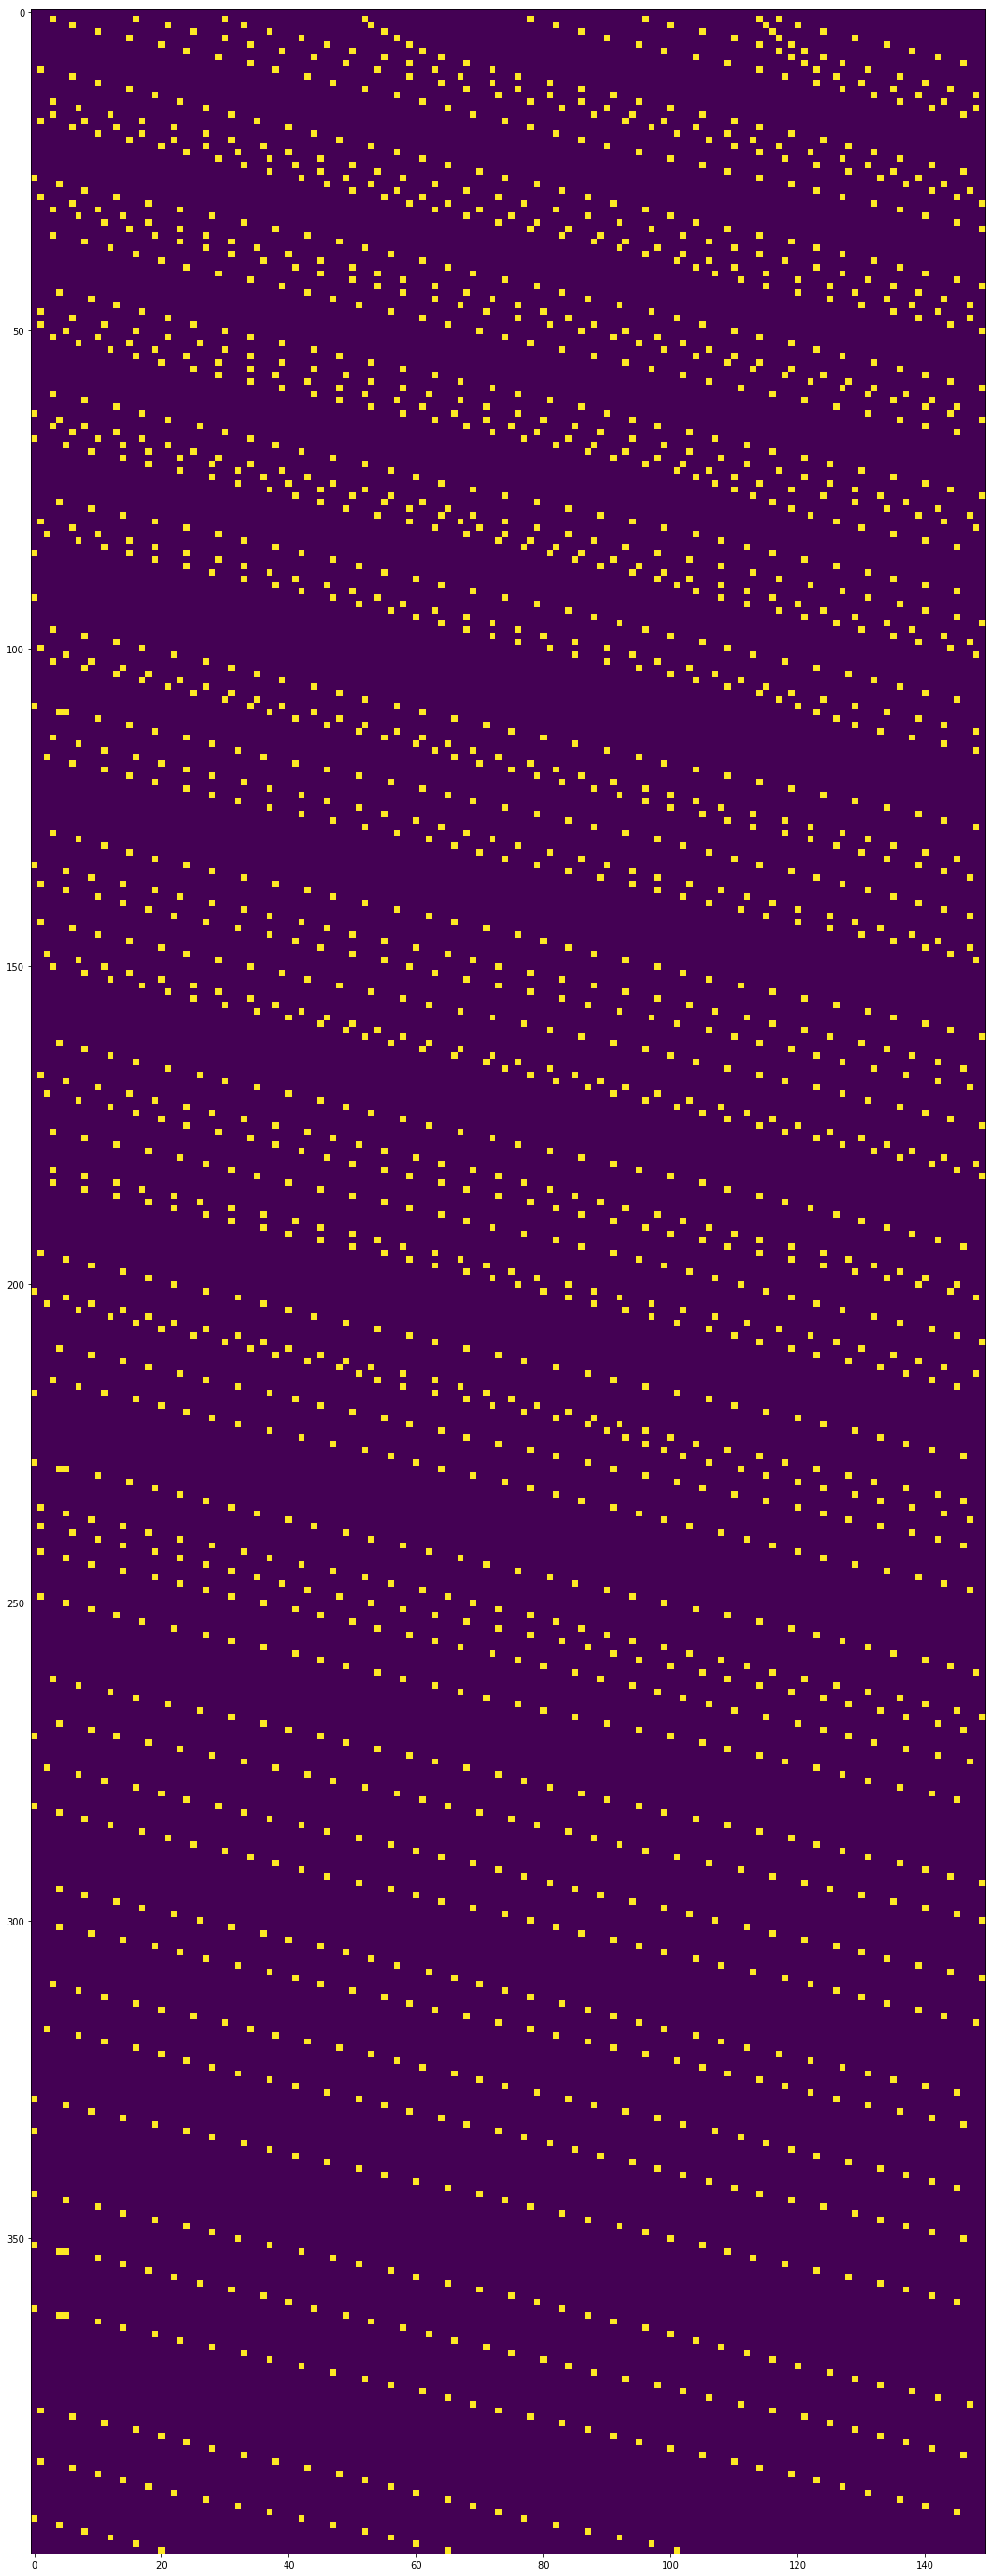

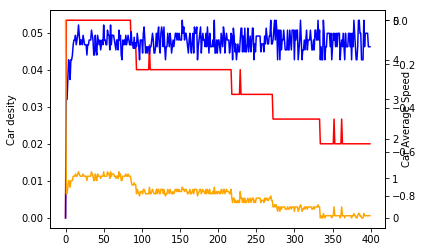

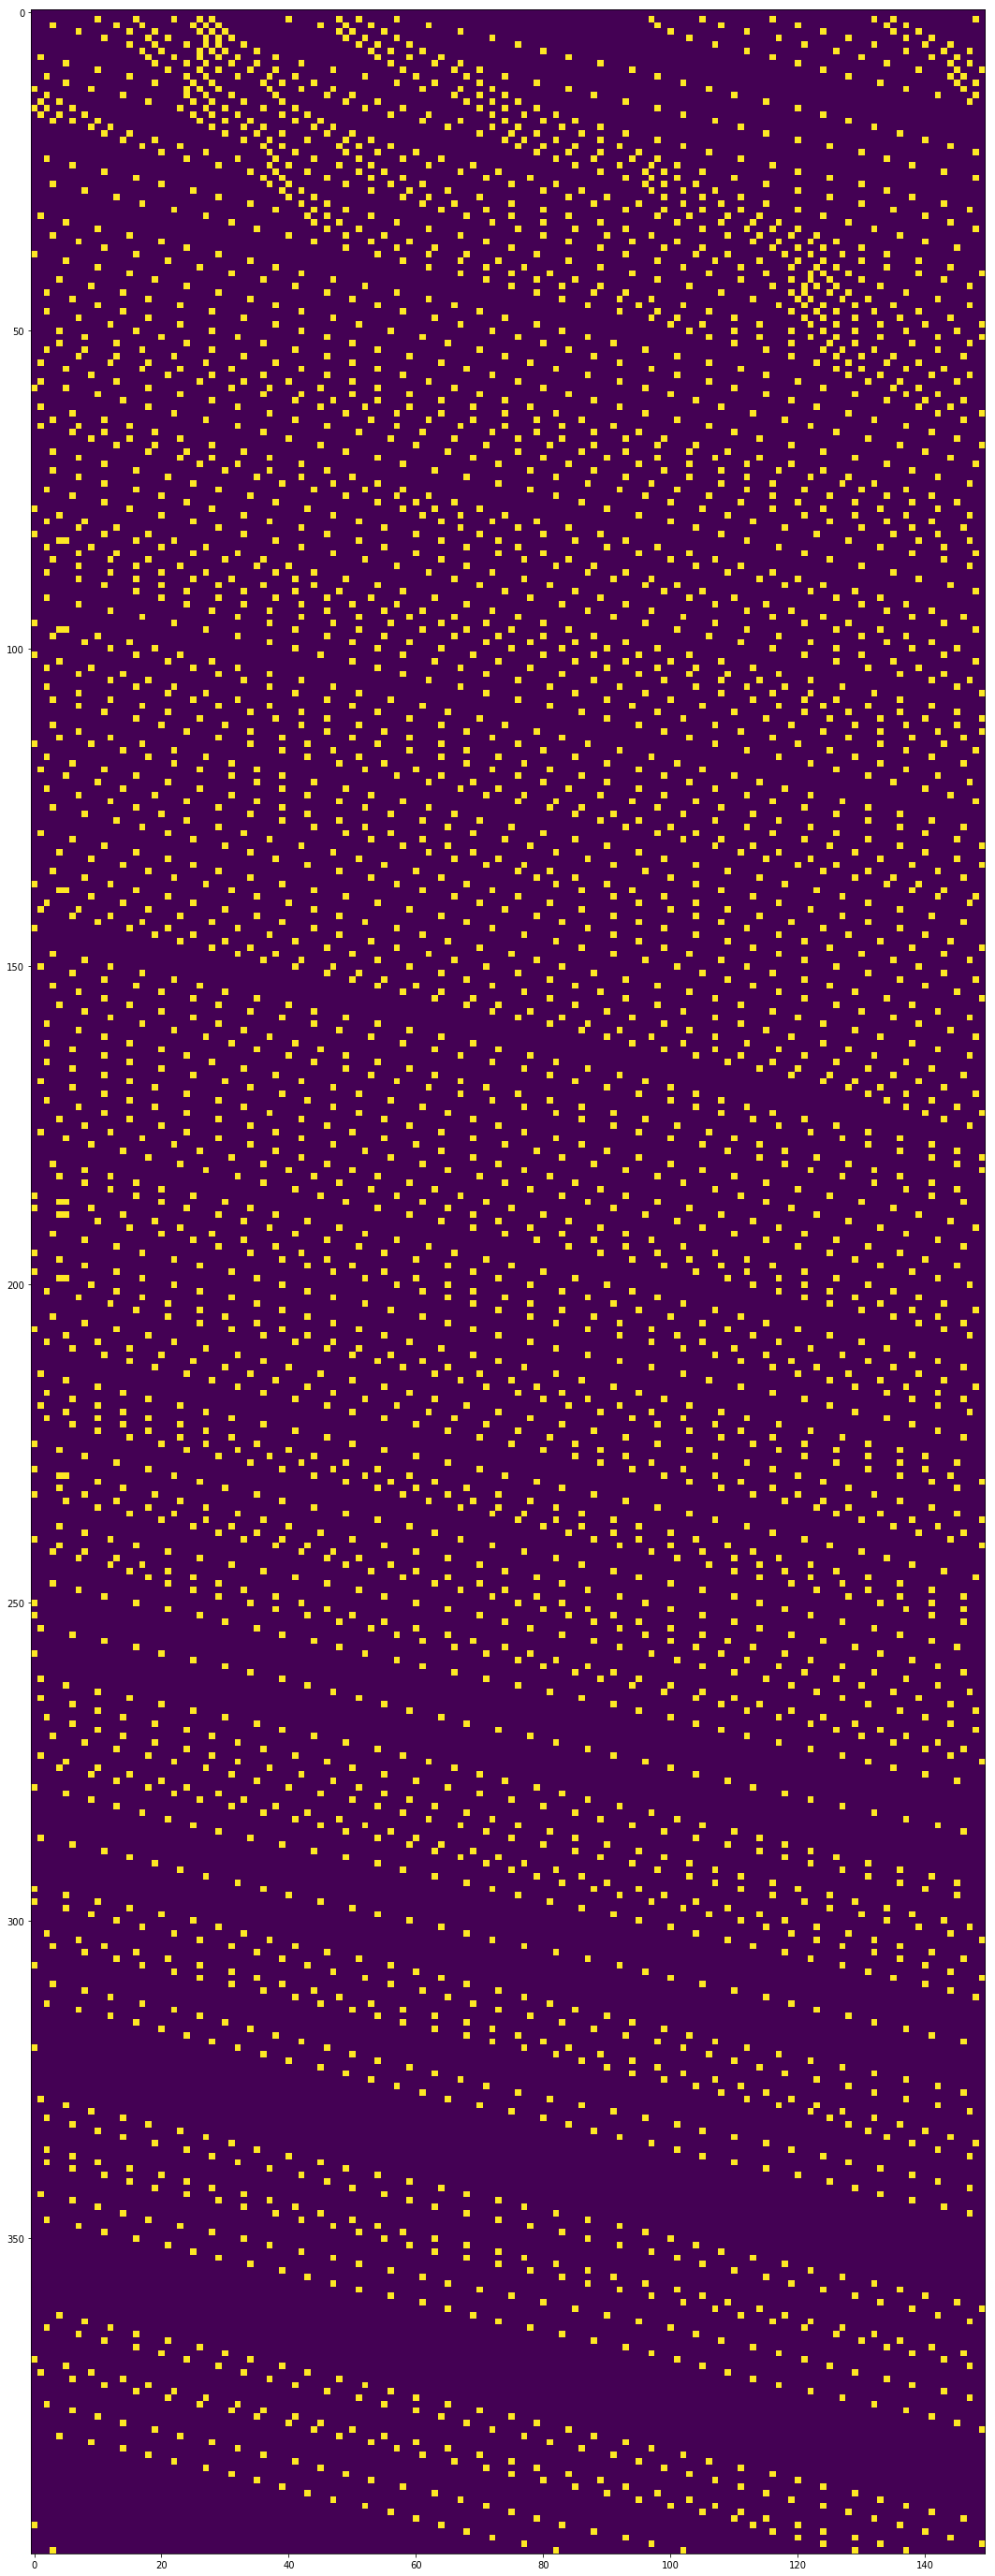

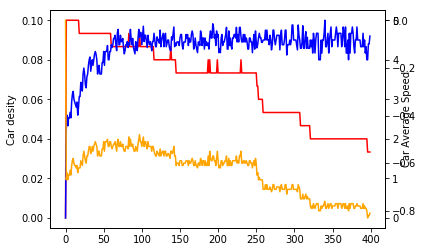

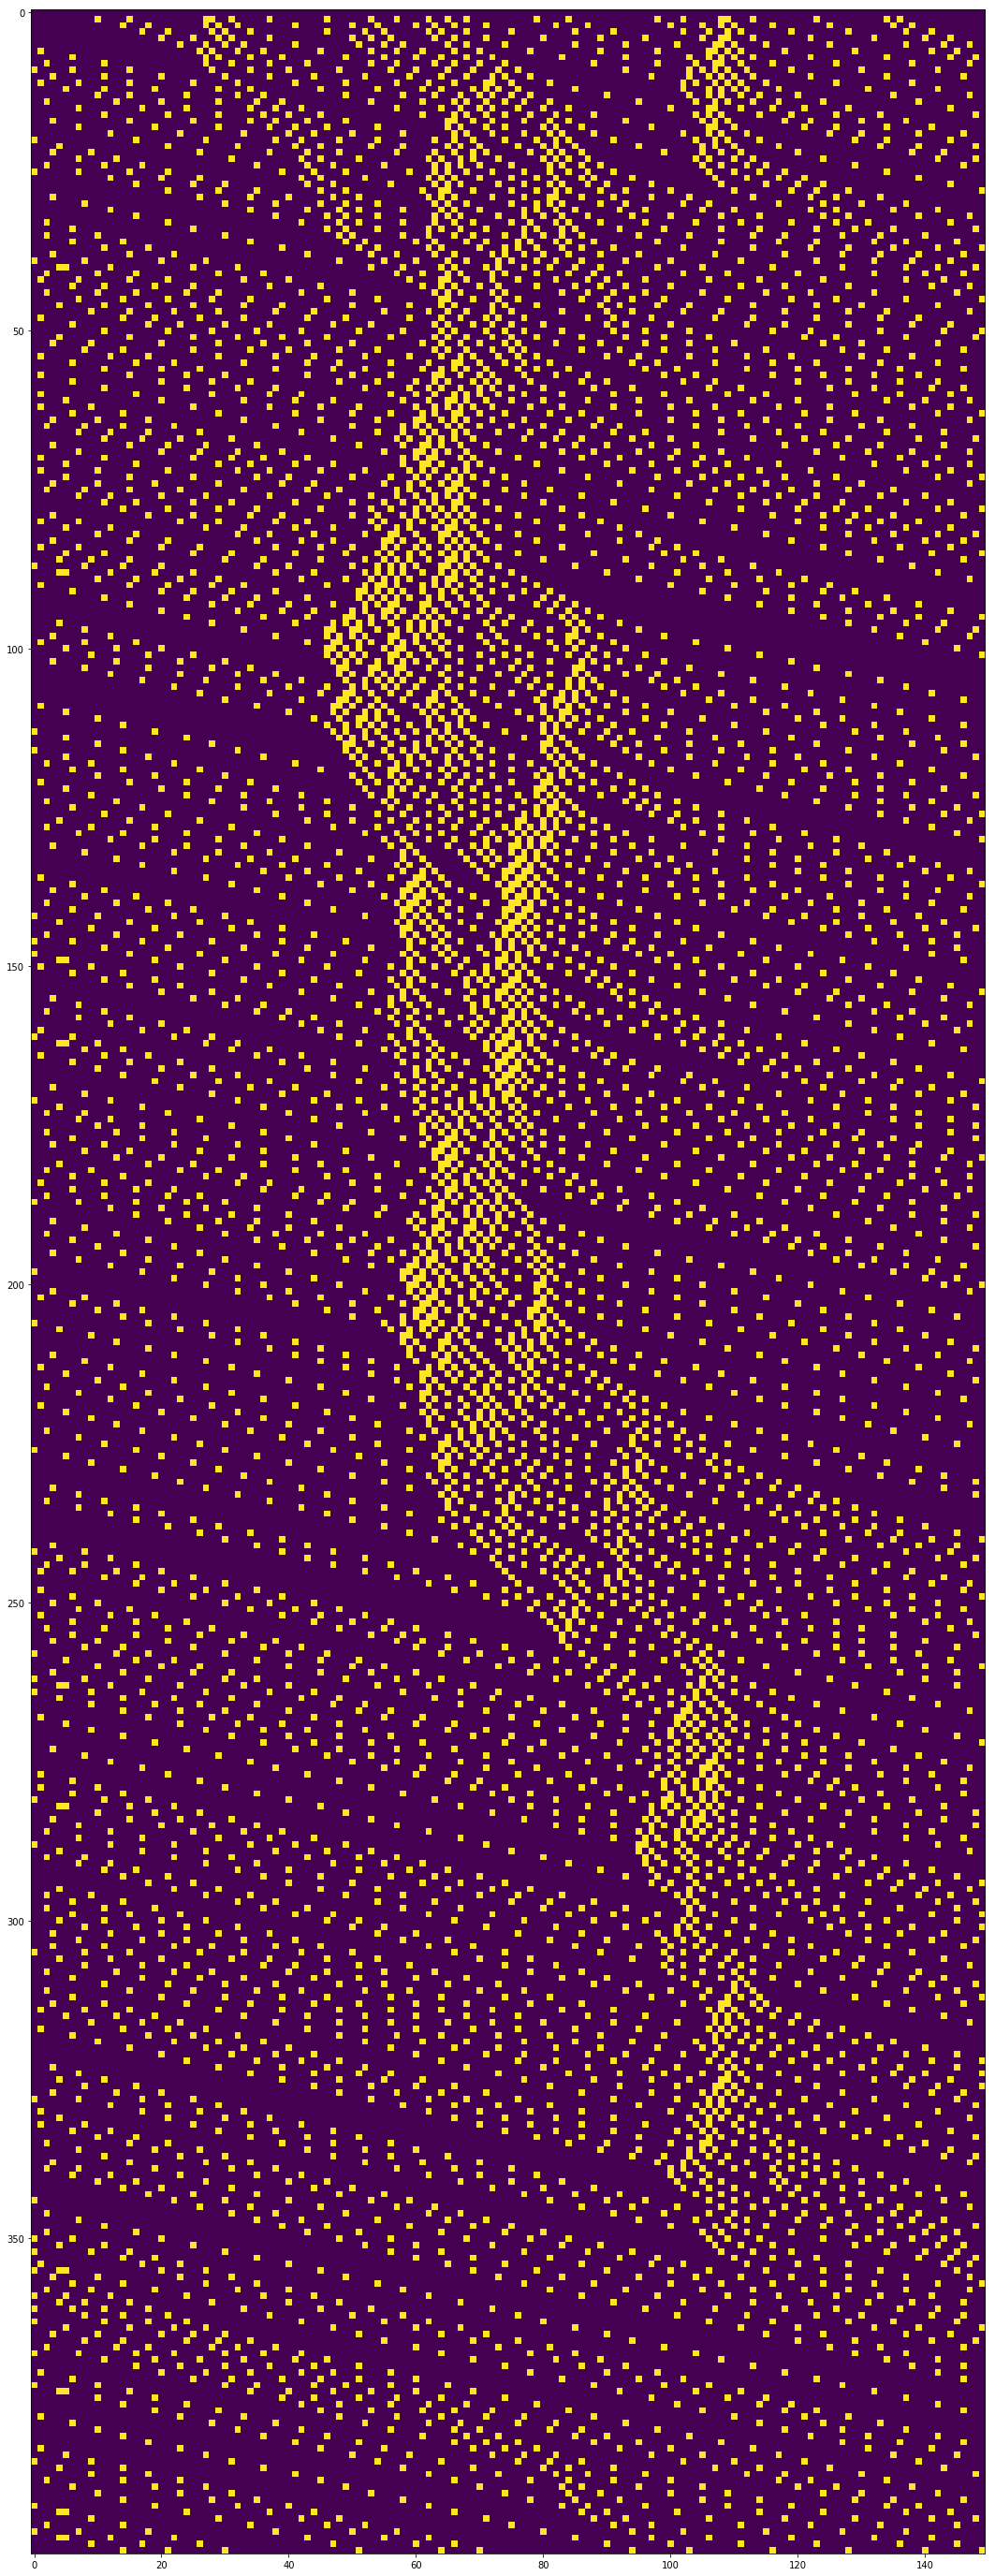

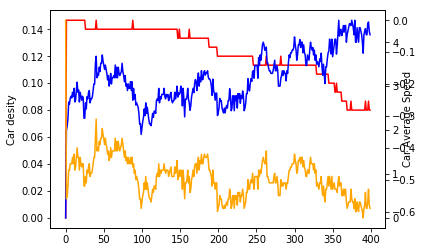

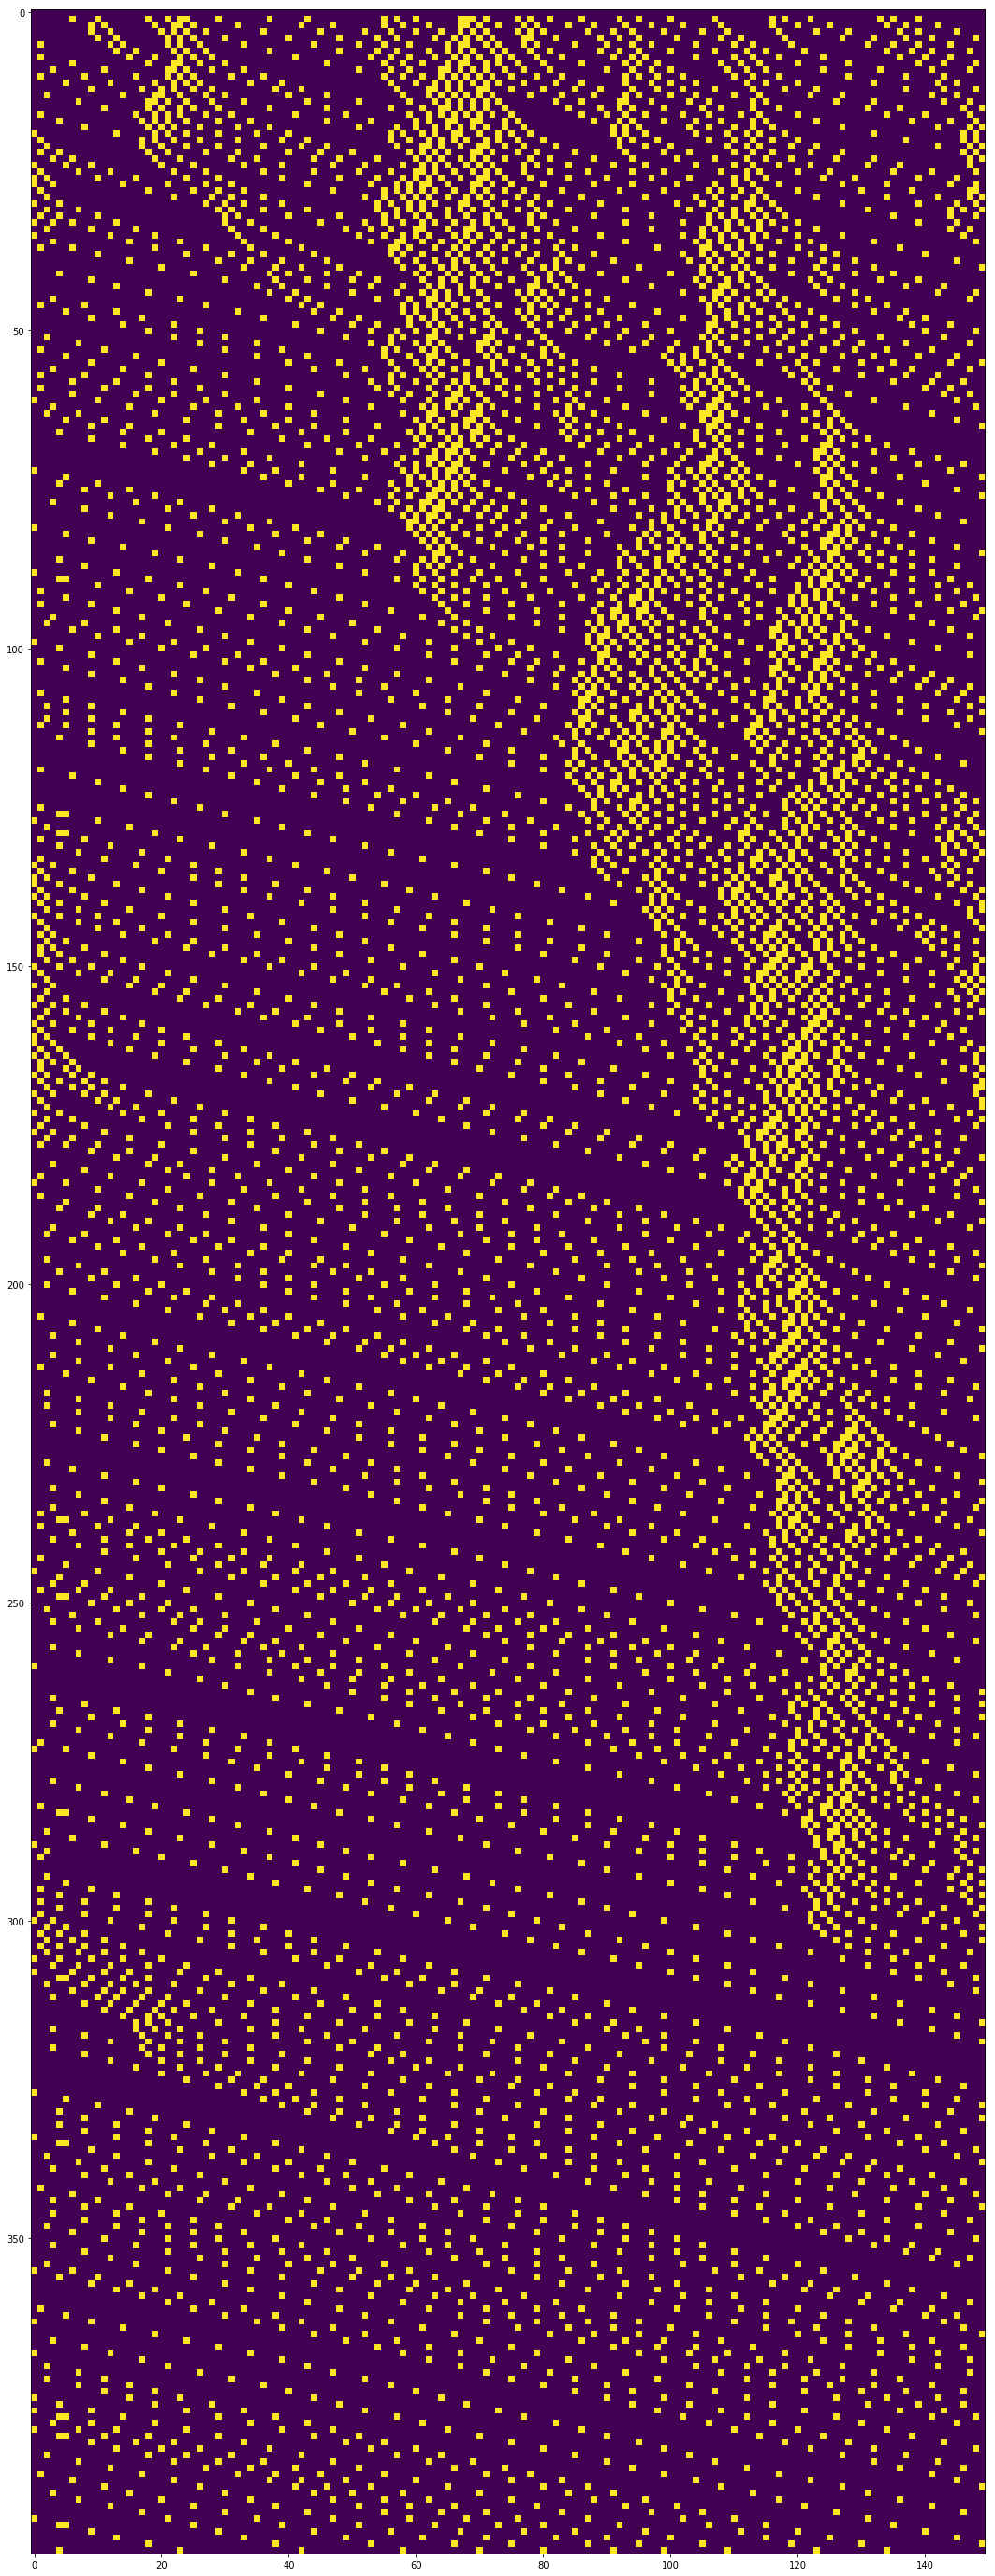

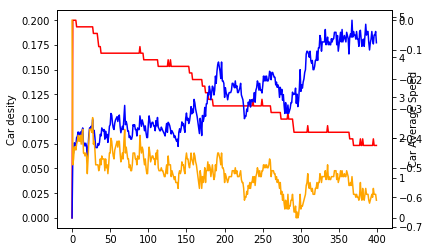

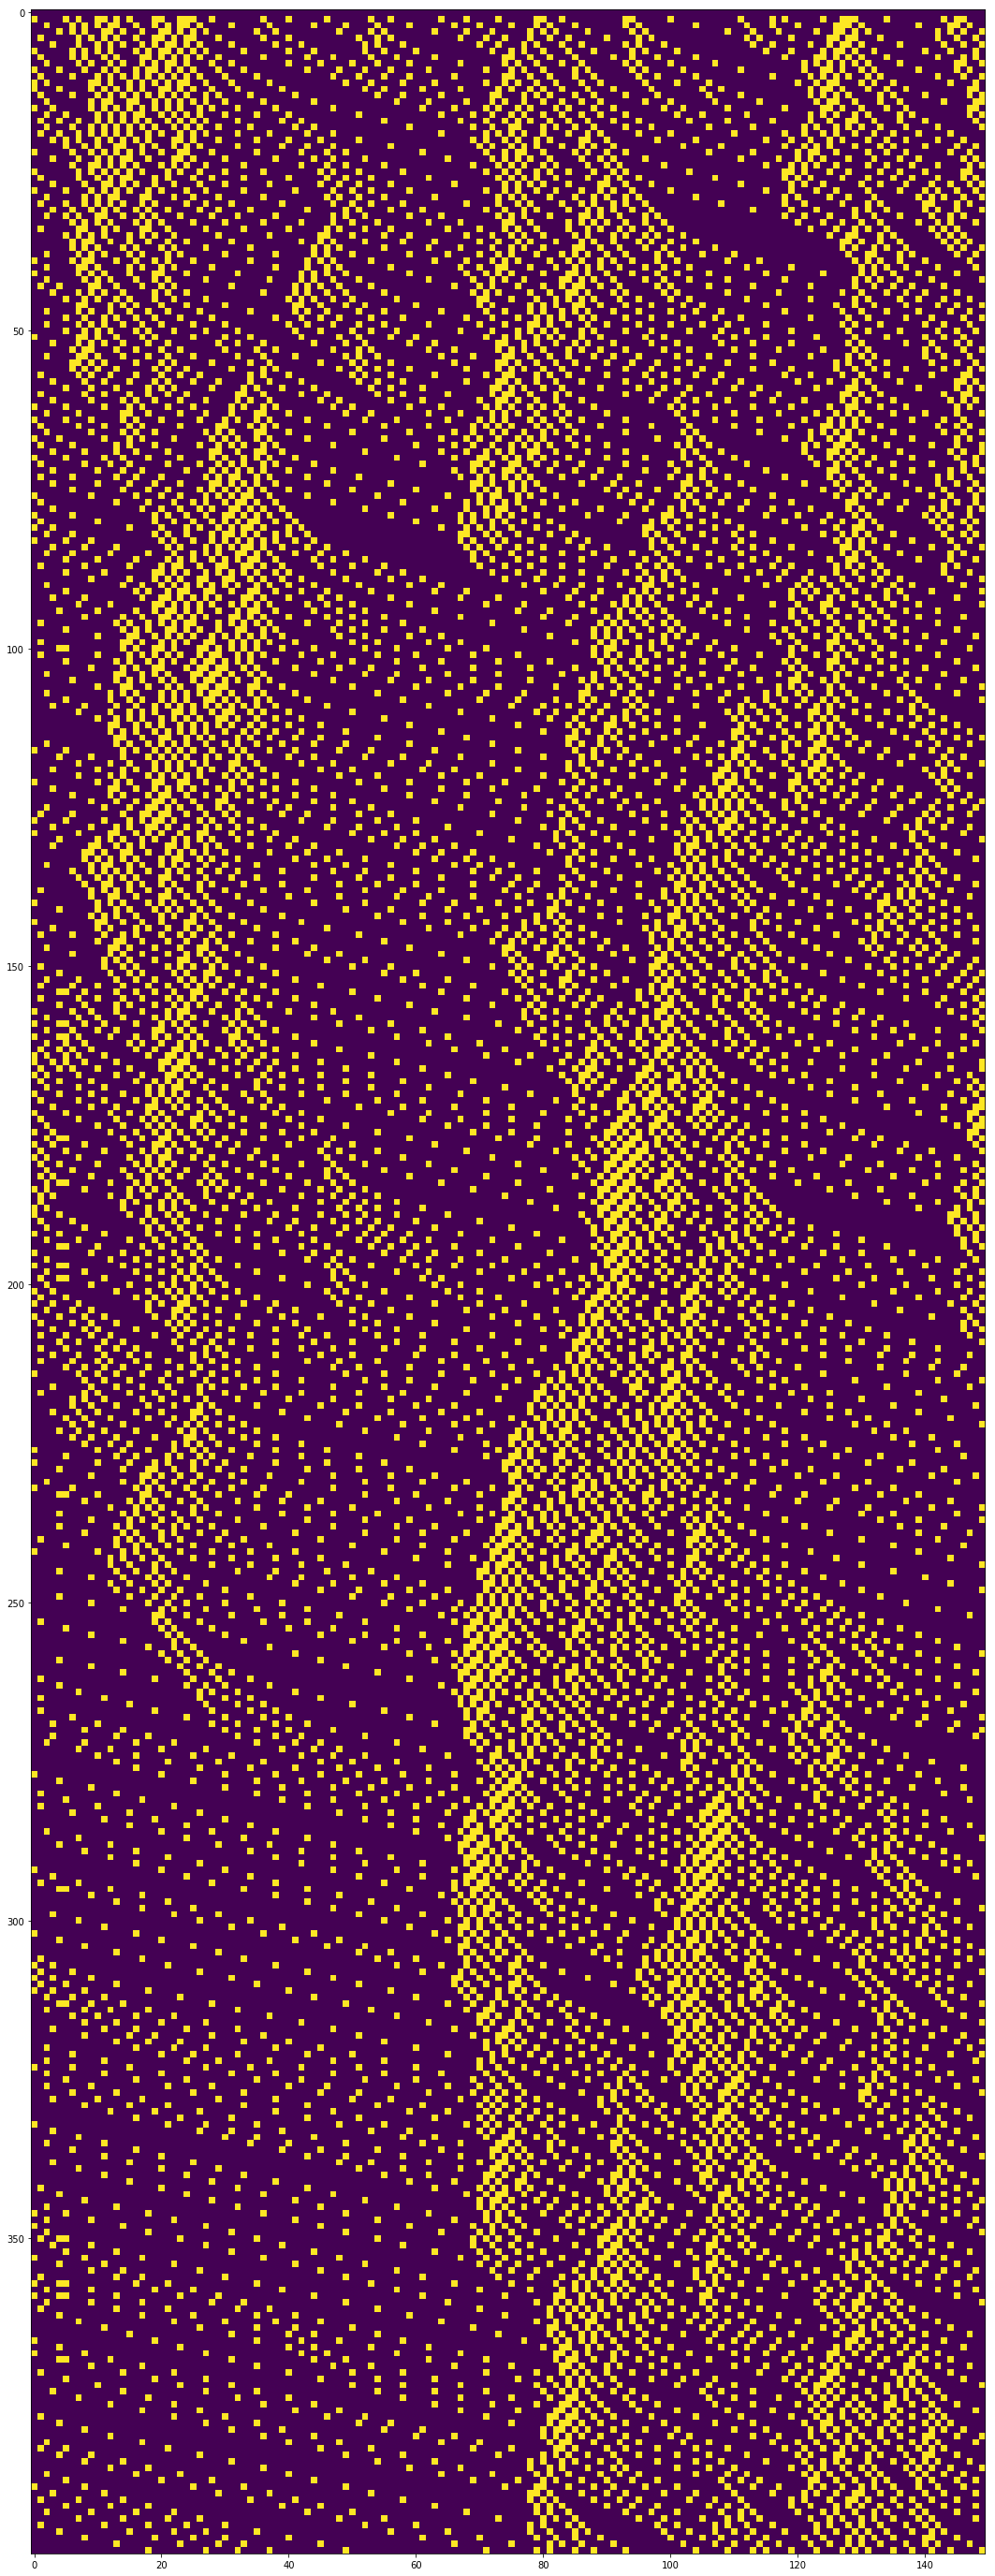

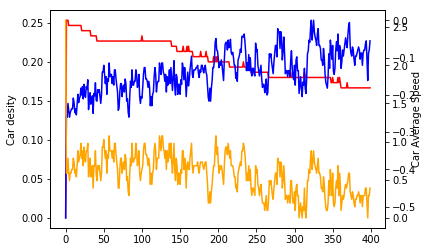

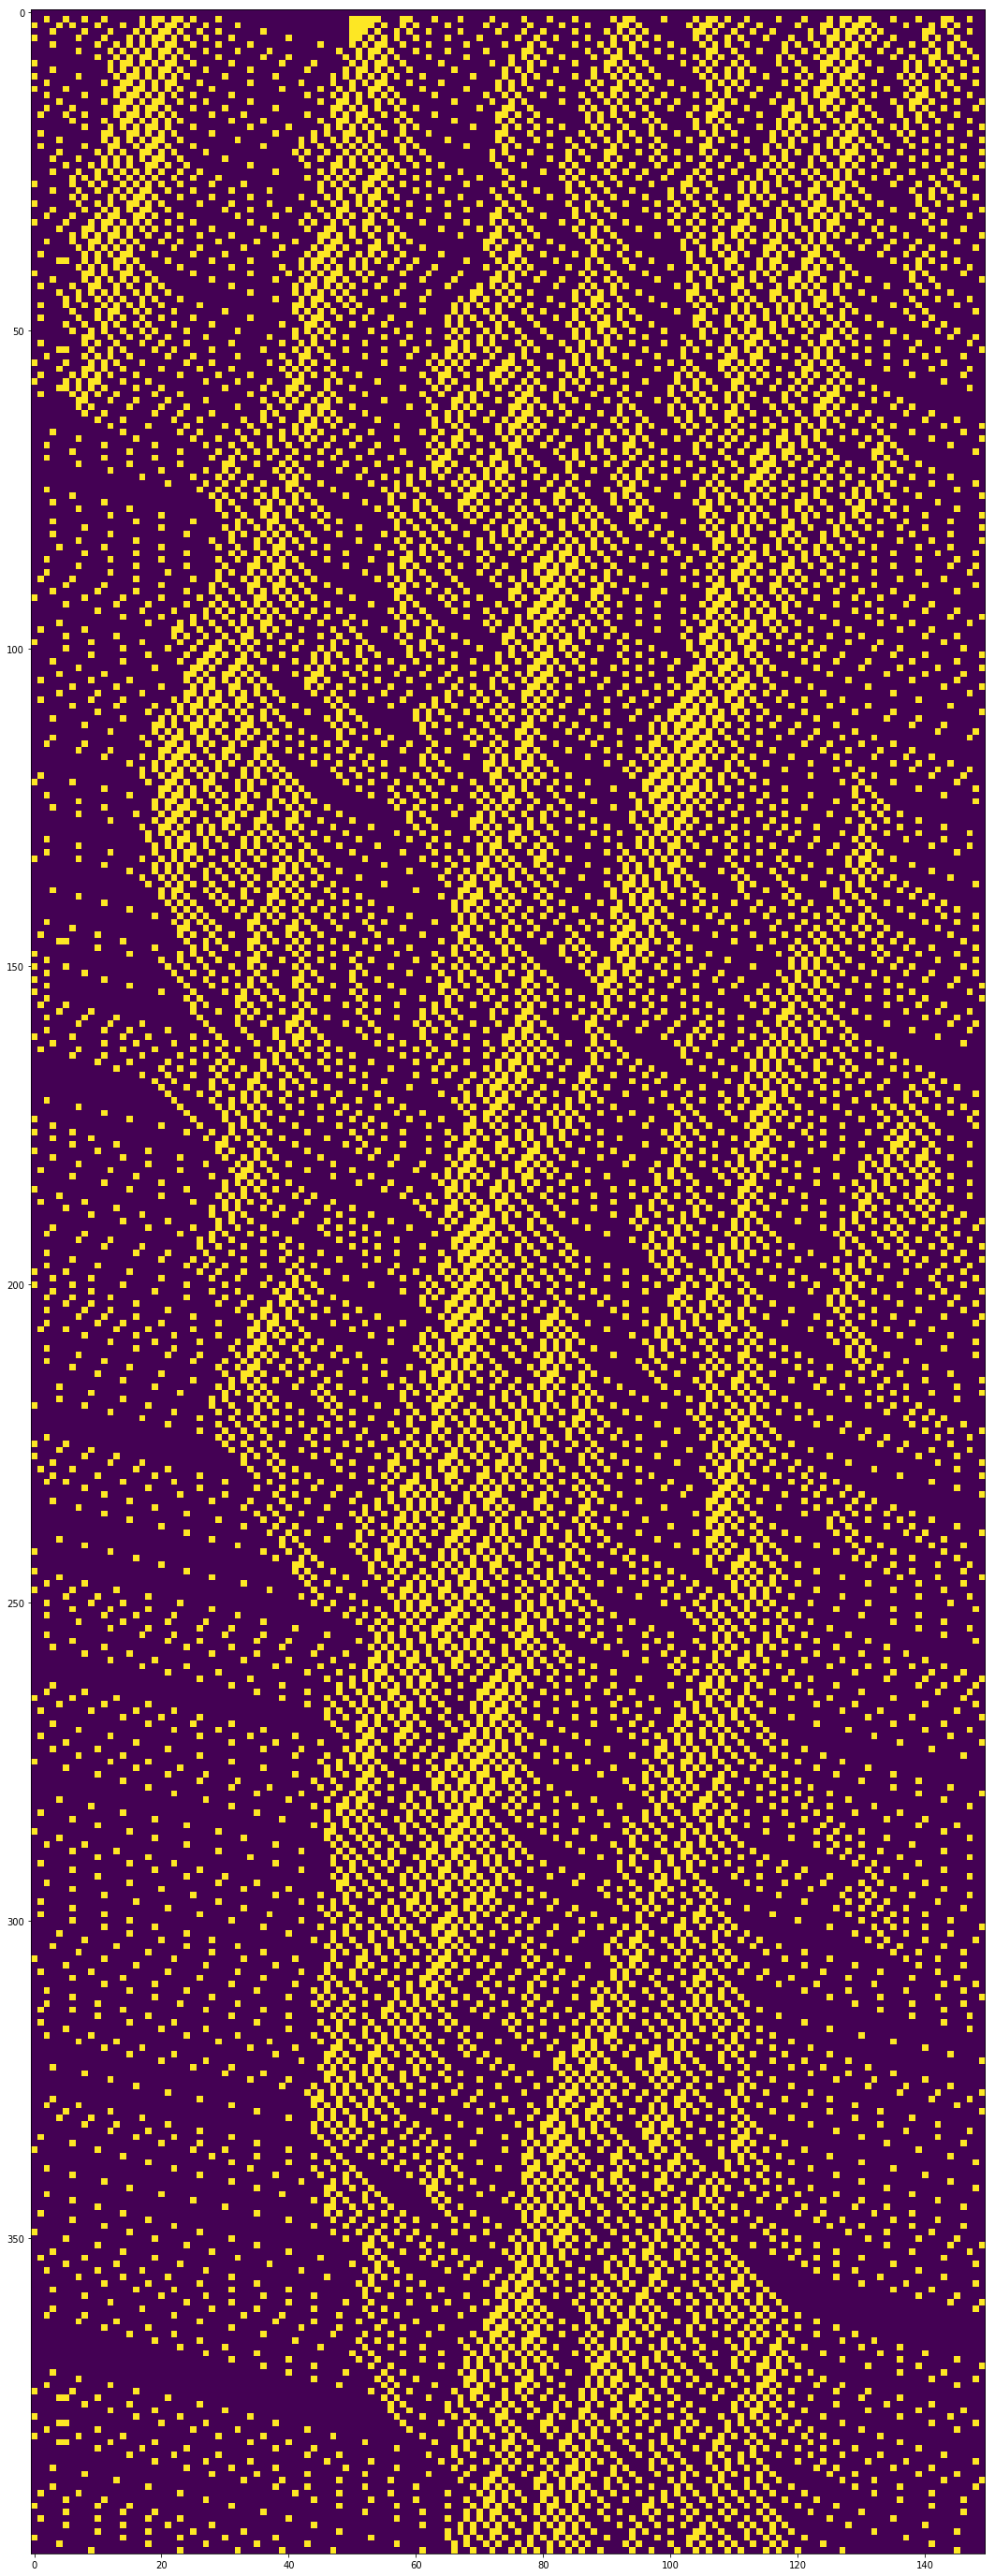

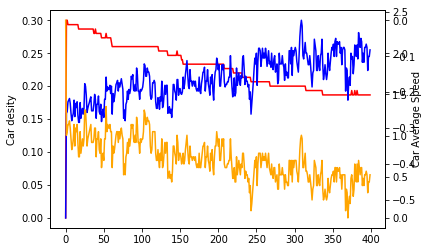

In [5]:
for i in range(5, 35, 5):
    single_lane_road_periodic_gen(150, 2, 6, i/100, 50/100, 400) #various different car densities